 # <center>Bike Sharing Linear Regression Assignment </center>

## About the Bike Sharing Dataset
### Overview
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back at another position. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.


Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

**Business Case:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
   - Which variables are significant in predicting the demand for shared bikes.
   - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import the required packages and read the day (bike sharing) dataset

In [1]:
# Import warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Reading the data file.
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check shape of dataframe.
df.shape

(730, 16)

In [5]:
# Check the descriptive Information in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the descriptive statistics in the dataset.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# finding the unique values from the dataset.
def meta_data(data):
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([unique, datatypes], axis=1, keys=['Unique', 'Data_Type'])

In [8]:
app_meta_data=meta_data(df)
app_meta_data.head(20)

,Unique,Data_Type
instant,730,int64
dteday,730,object
season,4,int64
yr,2,int64
mnth,12,int64
holiday,2,int64
weekday,7,int64
workingday,2,int64
weathersit,3,int64
temp,498,float64


In [9]:
# Dropping 'instant','dteday','atemp','casual' and 'registered' columns.
df = df.drop(columns = ['instant','dteday','atemp','casual','registered'])

In [10]:
df.shape

(730, 11)

**Dataset has 730 rows and 16 columns**:- 
- All 15 columns are either float or integer type and One column is date type. 
- In the data, there seems to be some fields that are categorical in nature, but in integer/float type.
- Need to analyse & decide whether to convert them to categorical or treat as integer.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


# creating dummy variables

In [12]:
def meta_data(data):
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([unique, datatypes], axis=1, keys=['Unique', 'Data_Type'])

In [13]:
app_meta_data=meta_data(df)
app_meta_data.head(20)

,Unique,Data_Type
season,4,int64
yr,2,int64
mnth,12,int64
holiday,2,int64
weekday,7,int64
workingday,2,int64
weathersit,3,int64
temp,498,float64
hum,594,float64
windspeed,649,float64


**Data Dictionary**:-

  1. season : season_1:spring, season_2:summer, season_3:fall, season_4:winter
  2. mnth : month ( 1 to 12)
  3. weathersit : 
     - weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
	 - weathersit_2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - weathersit_4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  4. weekday: day of the week 
     - ( weekday_1: Monday, weekday_2: Tuesday, weekday_3: Wednesday, weekday_4: Thursday, weekday_5: Friday, weekday_6: Saturday 

##  Data Visualisation

Without building any model or making any predictions, lets first look at the data by itself.

I construct a data frame that summarizes the bike sharing cnt (count) base on the season, mnth, is it weekdays,  is it workingday, is it a holiday, and the type of weather, then calculating the mean of temperature, humidity, wind speed and other variables. 

The purpose of this summarization is to find a general relationship between variables regardless of which year the data is from (since the data spans two years and the business is growing.)

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Also to identify if some predictors directly have a strong association with the outcome variable

### Performing EDA to understand various variables

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Using the summarized data frame, we can visualize some of the features of the data and let's make a pairplot of all the numeric variables.


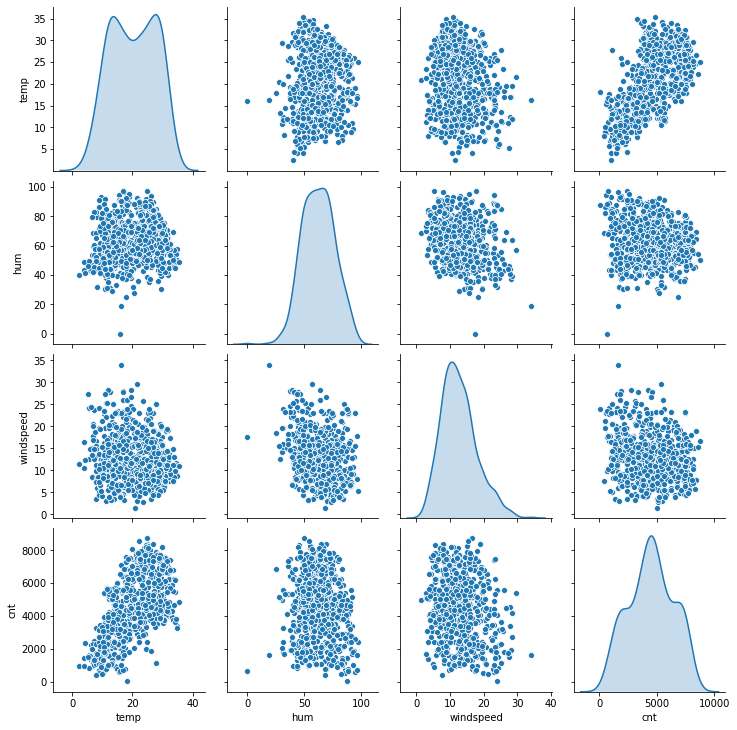

In [15]:
# Creating a new dataframe of numerical variables
df_num=df[[ 'temp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

Pair-Plot tells us that there is a **LINEAR RELATION** between **'temp' and 'cnt'** 

####  Visualising Catagorical Variables

Noticed, there are a few categorical variables as well. 
Let's make a boxplot for some of these variables to understand

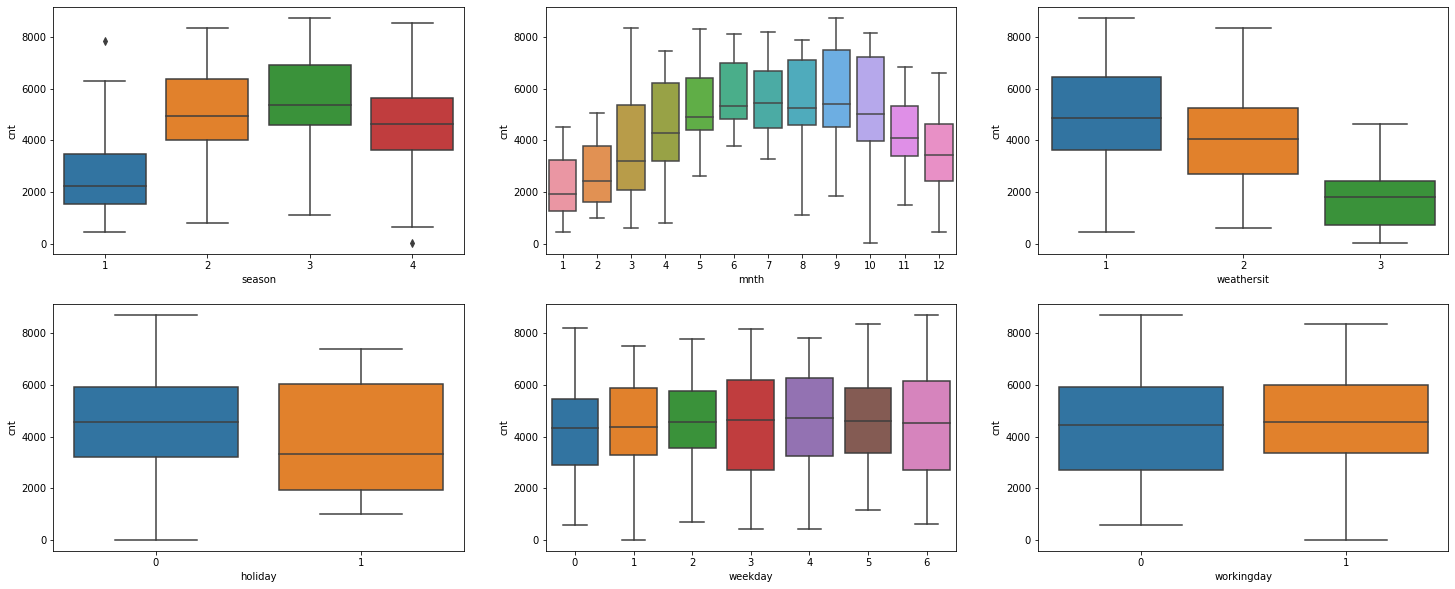

In [16]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

**There were 6 categorical variables in the dataset. I used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’)**

**The inference that I could derive were**:

- **SEASON**: High demand bike booking were happening in fall with a median of over 5000 booking. This was   followed by summer & winter with the total booking and very less demand in the spring season compared to others
     - Indicates:- season can be a good predictor for the dependent variable
     
- **MNTH (MONTH)**: High demand bike booking were happening in the months june to sept with a median of over 4000 booking per month as compared to other months. 
     - Indicates: mnth(month) has some trend for bookings and can be a good predictor for the dependent variable*

- **WEATHERSIT** : High demand bike booking were happening during weathersit_clear_fewclouds with a median of close to 5000 booking. This was followed by weathersit_MIst_cloudy with the total booking. 
     - Indicates:- weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 

- **HOLIDAY**: The bike booking were happening when it is not a holiday which means this data is clearly biased. 
    - Indicates:- holiday CANNOT be a good predictor for the dependent variable. 
    
- **WEEKDAY**: The demand of the bike booking shows very close trend having their independent medians between 4000 to 5000. 
    - This variable can have some or no influence towards the predictor. Let the model will decide if this needs to be added or not. 

- **WORKINGDAY**: There is no significant change in bike demand with workign day and non working day.The bike booking were happening in ‘workingday’ with a median of close to 5000 booking. 
    - Indicates, workingday can be a good predictor for the dependent variable

#### Correlation Matrix

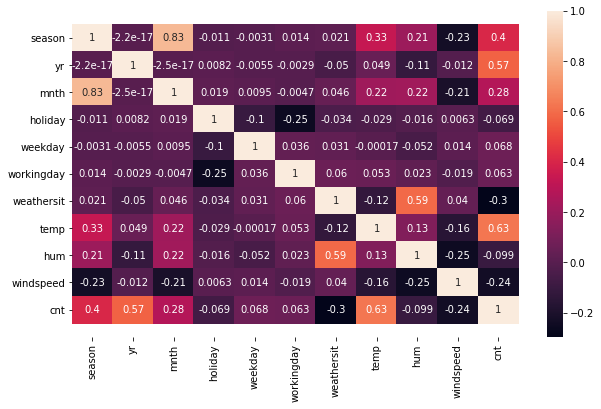

In [17]:
# Check the correlation coefficients to see which variables are highly correlated.
# (im considering only new dataframe variables (bike_1) that were chosen for analysis)
plt.figure(figsize = (10, 6))
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


#sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The `temp` and `cnt` are highly positively correlated `(0.63)` to each other.

**The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable**
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Data Preparation

Before diving into building statistical models:
1. Create dummy variables for all the categorical vairables
2. Divide the dataset into two sets, training and testing. 
3. performing scaling 
4. Dividing into X and Y sets for the model building

### Create dummy variables for all the categorical vairables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
- Before creating dummy variables, we will have to convert them into 'category' data types. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [19]:
# convert variables
df ['mnth']      = df ['mnth'].astype('category')
df ['weekday']   = df ['weekday'].astype('category')
df ['season']    = df ['season'].astype('category')
df ['weathersit']= df ['weathersit'].astype ('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [20]:
# Dummy Variables
df2 = pd.get_dummies(df, drop_first = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

### Divide the data to train and test

Dividing the dataset into two sets, Training (train) and Testing (test). 

Training set will be used to train statistical models and estimate coefficients, while testing set will be used to validate the model we build with the training set. 70% of the complete data is partitioned into training set, sampled uniformly without replacement, and 30% is partitioned in to testing set. Sampling without replacement enables the model we build to extrapolate on the testing data, giving us a better sense of how our statistical models perform. 
- We will use train_test_split method from sklearn package

In [21]:
# Shape of the new data set
df2.shape

(730, 29)

In [22]:
df2= df2.rename(columns= {'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter', 
                                  'weekday_1': 'monday','weekday_2': 'tuesday', 'weekday_3': 'wednesday', 
                                  'weekday_4': 'thursday','weekday_5': 'friday', 'weekday_6': 'saturday',
                                 'weathersit_1':'clear', 'weathersit_2': 'mist+cloudy', 'weathersit_3': 'light_snow+rain','weathersit_4': 'heavy_rain+ice',
                                 'mnth_2':'feb', 'mnth_3':'mar', 'mnth_4':'apr', 'mnth_5':'may', 'mnth_6':'june','mnth_7':'july',
                                 'mnth_8':'aug', 'mnth_9':'sept', 'mnth_10':'oct', 'mnth_11':'nov', 'mnth_12':'dec'})
df2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'june', 'july',
       'aug', 'sept', 'oct', 'nov', 'dec', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'mist+cloudy', 'light_snow+rain'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.70, test_size = 0.30, random_state = 150)

###### Train Dataset

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 726 to 442
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   cnt              510 non-null    int64  
 7   summer           510 non-null    uint8  
 8   fall             510 non-null    uint8  
 9   winter           510 non-null    uint8  
 10  feb              510 non-null    uint8  
 11  mar              510 non-null    uint8  
 12  apr              510 non-null    uint8  
 13  may              510 non-null    uint8  
 14  june             510 non-null    uint8  
 15  july             510 non-null    uint8  
 16  aug              510 non-null    uint8  
 17  sept          

In [25]:
# Checking the train dataset shape
df_train.shape

(510, 29)

###### Test Dataset

In [26]:
# Checking the test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 82 to 674
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   hum              219 non-null    float64
 5   windspeed        219 non-null    float64
 6   cnt              219 non-null    int64  
 7   summer           219 non-null    uint8  
 8   fall             219 non-null    uint8  
 9   winter           219 non-null    uint8  
 10  feb              219 non-null    uint8  
 11  mar              219 non-null    uint8  
 12  apr              219 non-null    uint8  
 13  may              219 non-null    uint8  
 14  june             219 non-null    uint8  
 15  july             219 non-null    uint8  
 16  aug              219 non-null    uint8  
 17  sept           

In [27]:
# Checking the test dataset shape
df_test.shape

(219, 29)

### Performing Scalling

In the Linear Regression, scaling doesn't impact on your model. It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
- Min-Max scaling (normalization): Between 0 and 1
- Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,monday,tuesday,wednesday,thursday,friday,saturday,mist+cloudy,light_snow+rain
726,1,0,1,0.204943,0.612987,0.274350,0.321623,0,0,0,...,0,1,0,0,0,0,1,0,1,0
589,1,0,1,0.815938,0.566667,0.234647,0.778945,0,1,0,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0.205602,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0.495956,0,1,0,...,0,0,1,0,0,0,0,0,1,0
608,1,0,0,0.858414,0.663203,0.187179,0.689243,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,monday,tuesday,wednesday,thursday,friday,saturday,mist+cloudy,light_snow+rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.033333,0.690196,0.523083,0.649428,0.340972,0.489320,0.250980,0.24902,0.241176,...,0.084314,0.070588,0.150980,0.149020,0.154902,0.137255,0.131373,0.143137,0.352941,0.023529
std,0.500456,0.179682,0.462867,0.243284,0.145042,0.158926,0.232820,0.434003,0.43287,0.428217,...,0.278131,0.256387,0.358381,0.356457,0.362166,0.344454,0.338139,0.350557,0.478354,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.306776,0.545021,0.229511,0.335084,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.535491,0.646584,0.323711,0.496620,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730987,0.751083,0.429488,0.652753,0.750000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,monday,tuesday,wednesday,thursday,friday,saturday,mist+cloudy,light_snow+rain
yr,1.000000,0.034957,0.009080,0.017245,-0.129786,-0.006541,0.551364,0.006811,-0.024966,0.011217,...,0.010627,-0.012069,0.010438,0.015937,-0.000383,0.004693,-0.001229,-0.011989,0.008689,-0.101668
holiday,0.034957,1.000000,-0.277168,-0.044813,-0.014064,-0.003387,-0.068325,-0.031912,-0.031153,-0.002553,...,0.022277,0.034117,0.318314,-0.047033,-0.049311,-0.042324,-0.039881,-0.075896,-0.022858,-0.028826
workingday,0.009080,-0.277168,1.000000,0.030033,0.051692,-0.026921,0.040513,0.025965,-0.016227,-0.018775,...,-0.010353,0.002532,0.128560,0.268455,0.275115,0.254904,0.247998,-0.610047,0.068897,0.076025
temp,0.017245,-0.044813,0.030033,1.000000,0.129429,-0.171141,0.629000,0.190149,0.672793,-0.212242,...,-0.206840,-0.261215,-0.041435,-0.005570,0.015833,0.029678,0.019896,0.015330,-0.104556,-0.043626
hum,-0.129786,-0.014064,0.051692,0.129429,1.000000,-0.274980,-0.079195,0.041921,0.001390,0.153878,...,0.007214,0.059606,0.015313,0.058385,0.077745,-0.070368,-0.026080,-0.063160,0.484326,0.222579
windspeed,-0.006541,-0.003387,-0.026921,-0.171141,-0.274980,1.000000,-0.223000,0.042633,-0.132238,-0.123599,...,-0.016293,-0.062378,-0.012162,-0.022635,0.010727,-0.035771,0.023050,0.030694,-0.024680,0.041924
cnt,0.551364,-0.068325,0.040513,0.629000,-0.079195,-0.223000,1.000000,0.178601,0.336747,0.091152,...,-0.047147,-0.150217,-0.055096,0.000009,0.003008,0.033213,0.040480,0.056816,-0.164031,-0.215572
summer,0.006811,-0.031912,0.025965,0.190149,0.041921,0.042633,0.178601,1.000000,-0.333331,-0.326340,...,-0.175650,-0.159527,0.033782,-0.013646,0.039654,-0.033757,-0.010920,-0.017066,0.074036,-0.089856
fall,-0.024966,-0.031153,-0.016227,0.672793,0.001390,-0.132238,0.336747,-0.333331,1.000000,-0.324638,...,-0.174734,-0.158695,-0.052867,-0.037249,-0.008428,0.033845,0.031082,0.036531,-0.121670,-0.029561
winter,0.011217,-0.002553,-0.018775,-0.212242,0.153878,-0.123599,0.091152,-0.326340,-0.324638,1.000000,...,0.538243,0.238314,-0.020106,0.034373,-0.013339,0.001567,-0.029291,0.031333,0.024824,0.124155


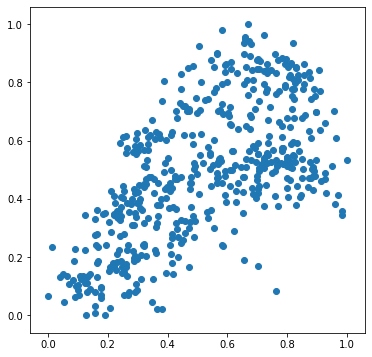

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets

Dividing train dataset into X and Y sets with respect to target variable 'cnt'

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,feb,...,nov,dec,monday,tuesday,wednesday,thursday,friday,saturday,mist+cloudy,light_snow+rain
726,1,0,1,0.204943,0.612987,0.274350,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
589,1,0,1,0.815938,0.566667,0.234647,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
608,1,0,0,0.858414,0.663203,0.187179,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [36]:
y_train.head()

726    0.321623
589    0.778945
60     0.205602
261    0.495956
608    0.689243
Name: cnt, dtype: float64

## Data Modelling and Evaluation

### Building a linear model

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default

# REF

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('feb', False, 8),
 ('mar', True, 1),
 ('apr', False, 2),
 ('may', True, 1),
 ('june', False, 3),
 ('july', False, 12),
 ('aug', False, 4),
 ('sept', True, 1),
 ('oct', True, 1),
 ('nov', False, 6),
 ('dec', False, 14),
 ('monday', False, 9),
 ('tuesday', False, 11),
 ('wednesday', False, 10),
 ('thursday', False, 13),
 ('friday', False, 7),
 ('saturday', True, 1),
 ('mist+cloudy', True, 1),
 ('light_snow+rain', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'mar', 'may', 'sept', 'oct', 'saturday', 'mist+cloudy',
       'light_snow+rain'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['holiday', 'feb', 'apr', 'june', 'july', 'aug', 'nov', 'dec', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday'],
      dtype='object')

### Create Linear Regression model using mixed approach

Building Linear model using 'STATS MODEL':

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

# model -1

Preparing Linear Regression model using mixed approach

In [42]:
X_train_rfe = X_train[col]

In [43]:
import statsmodels.api as sm

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#Check parameters 
lr1.params

const              0.166914
yr                 0.237154
workingday         0.052211
temp               0.431972
hum               -0.180714
windspeed         -0.145727
summer             0.148846
fall               0.107100
winter             0.173225
mar                0.031065
may                0.029623
sept               0.111258
oct                0.074417
saturday           0.057938
mist+cloudy       -0.052291
light_snow+rain   -0.243255
dtype: float64

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,21.26
3,hum,15.34
6,fall,7.20
1,workingday,4.81
4,windspeed,4.47
5,summer,4.19
7,winter,3.11
13,mist+cloudy,2.15
0,yr,1.95
12,saturday,1.78


In [47]:
# Summary of the linear regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.46e-187
Time:                        22:29:52   Log-Likelihood:                 491.08
No. Observations:                 510   AIC:                            -950.2
Df Residuals:                     494   BIC:                            -882.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1669      0.031     

INSIGHTS:

- `may` is insignificant in presence of other variables due to its `HIGH p-values` (p-value >0.05). so we can remove/ drop this variable
- Once update the this vairable, we will check the VIF values for further updation of the model

### Model-2

Dropping the **'may'** variable and Updating the Model

In [48]:
X_train_new = X_train_rfe.drop(["may"], axis = 1)

In [49]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params

const              0.160699
yr                 0.237334
workingday         0.052136
temp               0.439474
hum               -0.170660
windspeed         -0.147046
summer             0.156135
fall               0.101629
winter             0.170767
mar                0.026902
sept               0.110389
oct                0.073212
saturday           0.058139
mist+cloudy       -0.053649
light_snow+rain   -0.245302
dtype: float64

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.96
3,hum,15.20
6,fall,7.05
1,workingday,4.80
4,windspeed,4.40
5,summer,3.90
7,winter,3.08
12,mist+cloudy,2.15
0,yr,1.95
11,saturday,1.77


In [51]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.52e-187
Time:                        22:29:52   Log-Likelihood:                 489.68
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     495   BIC:                            -885.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1607      0.031     

INSIGHTS:

- `mar` is insignificant in presence of other variables due to its `HIGH p-values` (p-value >0.05). so we can remove/ drop this variable
- Once update the this vairable, we will check the VIF values for further updation of the model

### Model-3

Dropping the **'mar'** variable and Updating the Model

In [52]:
X_train_new = X_train_new.drop(["mar"], axis = 1)

In [53]:
X_train_lm3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const              0.164209
yr                 0.237852
workingday         0.053641
temp               0.442471
hum               -0.173910
windspeed         -0.145697
summer             0.152919
fall               0.095490
winter             0.165795
sept               0.110477
oct                0.072776
saturday           0.059693
mist+cloudy       -0.052308
light_snow+rain   -0.243206
dtype: float64

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.86
3,hum,15.20
6,fall,6.82
1,workingday,4.74
4,windspeed,4.37
5,summer,3.84
7,winter,2.94
11,mist+cloudy,2.14
0,yr,1.94
10,saturday,1.76


In [55]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.54e-188
Time:                        22:29:52   Log-Likelihood:                 488.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     496   BIC:                            -889.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1642      0.031     

INSIGHTS:

- `R2:0.841 and R2-adj:0.836`. All the variables are having `p-value <0.05`. Then we need to check `HIGH VIF` values where morethan or eaual to `5`. 
- Identified three features where VIF value is high i.e: `temp -20.86`, `hum- 15.20` and `fall - 6.82`.
- During the `EDA` analysis we found `temp` has a higly correlation with  `cnt` and based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'tem
- `hum` is insignificant in presence of other variables due to its `HIGH VIF`. so we can remove/ drop this variable

### Model-4

Dropping the **'hum'** variable and Updating the Model

In [56]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [57]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params

const              0.057499
yr                 0.243848
workingday         0.056097
temp               0.417200
windspeed         -0.109364
summer             0.153230
fall               0.103435
winter             0.161620
sept               0.099035
oct                0.070956
saturday           0.063589
mist+cloudy       -0.079374
light_snow+rain   -0.287976
dtype: float64

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.49
5,fall,6.65
1,workingday,4.26
3,windspeed,3.92
4,summer,3.82
6,winter,2.83
0,yr,1.94
8,oct,1.72
9,saturday,1.67
10,mist+cloudy,1.57


In [59]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.98e-185
Time:                        22:29:52   Log-Likelihood:                 478.39
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     497   BIC:                            -875.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0575      0.020     

INSIGHT:
- `R2:0.834 and R2-adj:0.830`. All the variables are having `p-value <0.05`. Then we need to check `HIGH VIF` values where morethan or eaual to `5`. 
- Identified three features where VIF value is high i.e: `temp -16.49` and `fall - 6.65`.
- During the `EDA` analysis we found `temp` has a higly correlation with  `cnt` and based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'tem
- `fall` is insignificant in presence of other variables due to its HIGH VIF. so we can remove/ drop this variable. 
- Even though the VIF of season_fall is second highest, we decided to drop 'season_fall' and not 'temp'.

### Model-5

Dropping the **'fall'** variable and Updating the Model

In [60]:
X_train_new = X_train_new.drop(["fall"], axis = 1)

In [61]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.params

const              0.044775
yr                 0.241021
workingday         0.054530
temp               0.544561
windspeed         -0.117837
summer             0.094150
winter             0.127493
sept               0.110826
oct                0.058345
saturday           0.065843
mist+cloudy       -0.078815
light_snow+rain   -0.288815
dtype: float64

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.56
1,workingday,4.22
3,windspeed,3.78
5,winter,2.01
0,yr,1.92
7,oct,1.69
8,saturday,1.67
4,summer,1.61
9,mist+cloudy,1.57
6,sept,1.24


In [63]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.07e-181
Time:                        22:29:53   Log-Likelihood:                 467.46
No. Observations:                 510   AIC:                            -910.9
Df Residuals:                     498   BIC:                            -860.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0448      0.020     

### Model-6

In [64]:
X_train_new = X_train_new.drop(["oct"], axis = 1)

In [65]:
X_train_lm6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.params

const              0.039390
yr                 0.240758
workingday         0.053872
temp               0.554885
windspeed         -0.116696
summer             0.092169
winter             0.149704
sept               0.100875
saturday           0.066156
mist+cloudy       -0.075682
light_snow+rain   -0.279792
dtype: float64

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.46
1,workingday,4.20
3,windspeed,3.78
0,yr,1.92
7,saturday,1.67
4,summer,1.60
8,mist+cloudy,1.55
5,winter,1.41
6,sept,1.20
9,light_snow+rain,1.09


In [67]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.76e-181
Time:                        22:29:53   Log-Likelihood:                 462.59
No. Observations:                 510   AIC:                            -903.2
Df Residuals:                     499   BIC:                            -856.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0394      0.020     

INSIGHT:
- `R2:0.824 and R2-adj:0.820`. All the values are **within permissible range of below 5**
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables.

##### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
  - F-statistic: 233.0
  - Prob (F-statistic): 7.76e-181
    
    **The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant**
> **For now, we will consider this as our final model, unless the Test data metrics are not significantly close to this number**

In [68]:
# List down model varibales and its coefficients

# assign final model to lm_final
lm_final = lr6

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sept', 'saturday', 'mist+cloudy', 'light_snow+rain']

Coefficent for the variables are:
const              0.039
yr                 0.241
workingday         0.054
temp               0.555
windspeed         -0.117
summer             0.092
winter             0.150
sept               0.101
saturday           0.066
mist+cloudy       -0.076
light_snow+rain   -0.280
dtype: float64


From the lm_final model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS

**The final varibles are: yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sept', 'saturday', 'mist+cloudy', 'light_snow+rain'**

### Check the various assumptions

#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [69]:
y_train_cnt = lr6.predict(X_train_lm6)

In [70]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

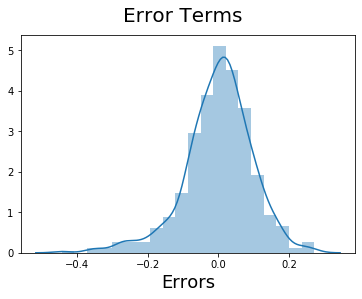

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
res_train = y_train - y_train_cnt
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

Text(0, 0.5, 'Residual')

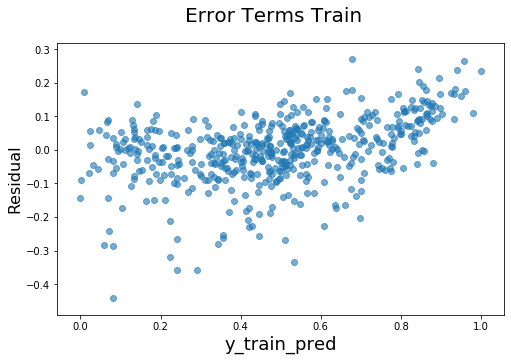

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize = (8,5))
plt.scatter(y_train, res_train, alpha=.6)

# Plot heading 
fig.suptitle('Error Terms Train', fontsize = 20)             

# label
plt.xlabel('y_train_pred', fontsize = 18)                          
plt.ylabel('Residual', fontsize = 16)

- It seems like the corresponding residual plot is reasonably random. 
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity) 

## Making Predictions
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 82 to 674
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   hum              219 non-null    float64
 5   windspeed        219 non-null    float64
 6   cnt              219 non-null    int64  
 7   summer           219 non-null    uint8  
 8   fall             219 non-null    uint8  
 9   winter           219 non-null    uint8  
 10  feb              219 non-null    uint8  
 11  mar              219 non-null    uint8  
 12  apr              219 non-null    uint8  
 13  may              219 non-null    uint8  
 14  june             219 non-null    uint8  
 15  july             219 non-null    uint8  
 16  aug              219 non-null    uint8  
 17  sept           

In [74]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [75]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,monday,tuesday,wednesday,thursday,friday,saturday,mist+cloudy,light_snow+rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.515982,0.018265,0.666667,0.562544,0.513959,0.361703,0.560753,0.255708,0.273973,0.251142,...,0.077626,0.118721,0.127854,0.127854,0.105023,0.155251,0.168950,0.146119,0.301370,0.041096
std,0.500889,0.134214,0.472484,0.228672,0.213944,0.204956,0.242181,0.437258,0.447017,0.434663,...,0.268194,0.324202,0.334692,0.334692,0.307285,0.362974,0.375566,0.354034,0.459904,0.198967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.370019,0.338517,0.210197,0.358545,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.562318,0.521532,0.331153,0.561620,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.772492,0.662979,0.482929,0.756854,1.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
# Adding constant variable to test dataframe
X_test = X_test[X_train_new.columns]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 82 to 674
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   windspeed        219 non-null    float64
 5   summer           219 non-null    uint8  
 6   winter           219 non-null    uint8  
 7   sept             219 non-null    uint8  
 8   saturday         219 non-null    uint8  
 9   mist+cloudy      219 non-null    uint8  
 10  light_snow+rain  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


####  Residual Analysis Of Testing Data 
Error terms are normally distributed with mean zero (not X, Y)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [78]:
y_test_pred = lr6.predict(X_test_lm6)

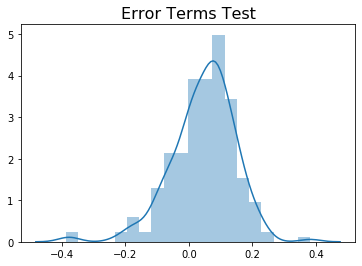

In [79]:
# Plot the histogram of the error terms
res_test = y_test-y_test_pred
plt.title('Error Terms Test', fontsize=16) 
sns.distplot(res_test)
plt.show()

We could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

#### Model Evaluation

In [80]:
#X_test_m6 = X_test_m6[X_train_lm7.columns]
y_pred_m6 = lr6.predict(X_test_lm6)

Text(0, 0.5, 'Residual')

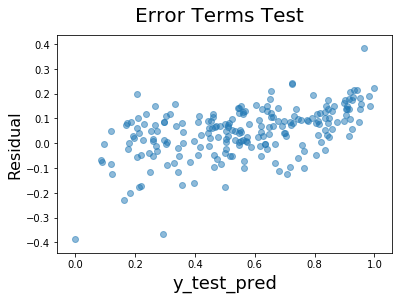

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, res_test, alpha=.5)
fig.suptitle('Error Terms Test', fontsize = 20)             # Plot heading 
plt.xlabel('y_test_pred', fontsize = 18)                          # X-label
plt.ylabel('Residual', fontsize = 16)

Text(0, 0.5, 'y_pred')

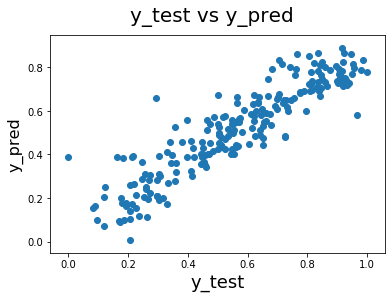

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [83]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 726 to 442
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   workingday       510 non-null    int64  
 2   temp             510 non-null    float64
 3   windspeed        510 non-null    float64
 4   summer           510 non-null    uint8  
 5   winter           510 non-null    uint8  
 6   sept             510 non-null    uint8  
 7   saturday         510 non-null    uint8  
 8   mist+cloudy      510 non-null    uint8  
 9   light_snow+rain  510 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 22.9 KB


#### R^2 Value for TEST

In [84]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_m6)
r2_test

0.7901663839174422

#####  Adjusted R^2 Value for TEST

Formula for Adjusted R^2

##### $R2adj.=1−(1−R2)∗ (n−1)/(n−p−1)$

In [85]:
# We already have the value of R^2 (calculated in above step)

r2=r2_test

In [86]:
# Get the shape of X_test

X_test.shape

(219, 10)

In [87]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2_test_adj = 1-(1-r2)*(n-1)/(n-p-1)
r2_test_adj

0.7800782292980885

### Check the Adjusted R-Square for both test and train data

**RESULT COMPARISION**

In [88]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,3), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

R- Sqaured train:  0.824   Adj. R-Squared train: 0.82
R- Sqaured test :  0.79   Adj. R-Squared test : 0.78


> ###### Train R^2 :0.824 - Train Adjusted R^2 :0.82 
> ###### Test R^2 :0.790 - Test Adjusted R^2 :0.78

This seems to be a **really good model** that can very well 'Generalize' various datasets

### Final Report

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

In [89]:
# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))


Coefficent for the variables are:
const              0.039
yr                 0.241
workingday         0.054
temp               0.555
windspeed         -0.117
summer             0.092
winter             0.150
sept               0.101
saturday           0.066
mist+cloudy       -0.076
light_snow+rain   -0.280
dtype: float64


#### The equation of best fitted surface based on model lm_final

$ cnt=0.039+(yr×0.241)+(workingday×0.054)+(temp×0.555)−(windspeed×0.117)+(summer×0.092)+(winter×0.150)+(sept×0.101)+(saturday×0.066)−(Mist+cloudy×0.076)−(light_snow_rain×0.280)$

As per our final Model, the top 3 features contributing significantly towards explaining the demand of the shared bike

- **Temperature (temp)** 
  - A coefficient value of ‘0.555’ indicated that a unit increase in temp variable increases the bike hire numbers 
- **Light_Snow + Rain**
  - A coefficient value of ‘-0.280’ indicated that, w.r.t Weathersit_Mist_cloudy, a unit increase in Weathersit_LightSnow_LightRain  variable decreases the bike hire numbers  
- **Year (yr)**
  - A coefficient value of ‘0.241’ indicated that a unit increase in yr variable increases the bike hire numbers 
  
**SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM DEBOOKING**

>
**The next best features that can also be considered are** 
- **winter**
  - A coefficient value of ‘0.150’ indicated that increases the bike hire numbers 
- **windspeed** 
  - A coefficient value of ‘-0.117’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers 
